                            MAE           MSE  R² Score
Linear Regression  9.700434e+05  1.754319e+12  0.652924
Random Forest      1.022197e+06  1.961944e+12  0.611848
Gradient Boosting  9.605788e+05  1.689379e+12  0.665772
SVR                1.763890e+06  5.567945e+12 -0.101566


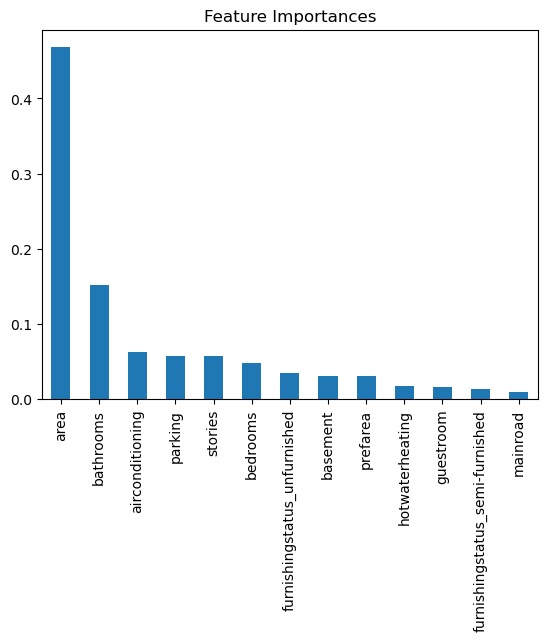

In [5]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.preprocessing import OneHotEncoder, StandardScaler # type: ignore
from sklearn.linear_model import LinearRegression # type: ignore
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor # type: ignore
from sklearn.svm import SVR # type: ignore
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # type: ignore

# Load dataset
data = pd.read_csv("data/housing.csv")  # Updated file path

# Convert categorical variables to numeric
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in categorical_cols:
    data[col] = data[col].map({'yes': 1, 'no': 0})

# One-hot encode 'furnishingstatus'
data = pd.get_dummies(data, columns=['furnishingstatus'], drop_first=True)



# Define features and target
X = data.drop(columns=['price'])
y = data['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(kernel='rbf')
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'MAE': mae, 'MSE': mse, 'R² Score': r2}

# Convert results to DataFrame and display
results_df = pd.DataFrame(results).T
print(results_df)

# Feature importance (for tree-based models)
rf_model = models["Random Forest"]
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', title='Feature Importances')
plt.show()
